In [1]:
#install Theano and Lasagne
!pip install git+https://github.com/Theano/Theano
!pip install git+https://github.com/Lasagne/Lasagne

  Cloning https://github.com/Theano/Theano to /tmp/pip-req-build-3f140jes
  Running command git clone -q https://github.com/Theano/Theano /tmp/pip-req-build-3f140jes
  Created wheel for Theano: filename=Theano-1.0.5+1.geb6a4125c-cp36-none-any.whl size=2668281 sha256=9a74e2e539b07f06d2dd107ad7bc72a4749bd115ee5df08bad07d44398f490e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-d_l_an1c/wheels/64/f2/f4/6b1f50baf18aca2eab5d9b5a431b90e3d8be4711c8f7457eb7
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5
  Cloning https://github.com/Lasagne/Lasagne to /tmp/pip-req-build-7po6lr9d
  Running command git clone -q https://github.com/Lasagne/Lasagne /tmp/pip-req-build-7po6lr9d
  Created wheel for Lasagne: filename=Lasagne-0.2.dev1-cp36-none-any.whl size=122797 sha256=b51a74e9a2ac8c4dcd85390e95a6c64c55912171d885c261e18953e0204e1765
  Stored in directory: /tmp/pip-ephem-wheel-cache-r0lp1uct/wheels/c4/2

# **VGG** **Model**

In [2]:
from lasagne.layers import Conv2DLayer as ConvLayer
from lasagne.layers import Pool2DLayer as PoolLayer
from lasagne.layers import InputLayer
import lasagne
import numpy as np
import theano
class RGBtoBGRLayer(lasagne.layers.Layer):
    def __init__(self, l_in, bgr_mean=np.array([103.939, 116.779, 123.68]),
                 data_format='bc01', **kwargs):
        """A Layer to normalize and convert images from RGB to BGR
        This layer converts images from RGB to BGR to adapt to Caffe
        that uses OpenCV, which uses BGR. It also subtracts the
        per-pixel mean.
        Parameters
        ----------
        l_in : :class:``lasagne.layers.Layer``
            The incoming layer, typically an
            :class:``lasagne.layers.InputLayer``
        bgr_mean : iterable of 3 ints
            The mean of each channel. By default, the ImageNet
            mean values are used.
        data_format : str
            The format of l_in, either `b01c` (batch, rows, cols,
            channels) or `bc01` (batch, channels, rows, cols)
        """
        super(RGBtoBGRLayer, self).__init__(l_in, **kwargs)
        assert data_format in ['bc01', 'b01c']
        self.l_in = l_in
        floatX = theano.config.floatX
        self.bgr_mean = bgr_mean.astype(floatX)
        self.data_format = data_format

    def get_output_for(self, input_im, **kwargs):
        if self.data_format == 'bc01':
            input_im = input_im[:, ::-1, :, :]
            input_im -= self.bgr_mean[:, np.newaxis, np.newaxis]
        else:
            input_im = input_im[:, :, :, ::-1]
            input_im -= self.bgr_mean
        return input_im


def build_vgg(inputHeight, inputWidth, input_var):
    """
    Bulid only Convolutional part of the VGG-16 Layer model, all fully connected layers are removed.
    First 3 group of ConvLayers are fixed (not trainable).
    :param input_layer: Input layer of the network.
    :return: Dictionary that contains all layers.
    """

    net = {'input': InputLayer((None, 3, inputHeight, inputWidth), input_var=input_var)}
    print("Input: {}".format(net['input'].output_shape[1:]))

    net['bgr'] = RGBtoBGRLayer(net['input'])

    net['conv1_1'] = ConvLayer(net['bgr'], 64, 3, pad=1, flip_filters=False)
    net['conv1_1'].add_param(net['conv1_1'].W, net['conv1_1'].W.get_value().shape, trainable=False)
    net['conv1_1'].add_param(net['conv1_1'].b, net['conv1_1'].b.get_value().shape, trainable=False)
    print("conv1_1: {}".format(net['conv1_1'].output_shape[1:]))

    net['conv1_2'] = ConvLayer(net['conv1_1'], 64, 3, pad=1, flip_filters=False)
    net['conv1_2'].add_param(net['conv1_2'].W, net['conv1_2'].W.get_value().shape, trainable=False)
    net['conv1_2'].add_param(net['conv1_2'].b, net['conv1_2'].b.get_value().shape, trainable=False)
    print("conv1_2: {}".format(net['conv1_2'].output_shape[1:]))

    net['pool1'] = PoolLayer(net['conv1_2'], 2)
    print( "pool1: {}".format(net['pool1'].output_shape[1:]))

    net['conv2_1'] = ConvLayer(net['pool1'], 128, 3, pad=1, flip_filters=False)
    net['conv2_1'].add_param(net['conv2_1'].W, net['conv2_1'].W.get_value().shape, trainable=False)
    net['conv2_1'].add_param(net['conv2_1'].b, net['conv2_1'].b.get_value().shape, trainable=False)
    print( "conv2_1: {}".format(net['conv2_1'].output_shape[1:]))

    net['conv2_2'] = ConvLayer(net['conv2_1'], 128, 3, pad=1, flip_filters=False)
    net['conv2_2'].add_param(net['conv2_2'].W, net['conv2_2'].W.get_value().shape, trainable=False)
    net['conv2_2'].add_param(net['conv2_2'].b, net['conv2_2'].b.get_value().shape, trainable=False)
    print("conv2_2: {}".format(net['conv2_2'].output_shape[1:]))

    net['pool2'] = PoolLayer(net['conv2_2'], 2)
    print("pool2: {}".format(net['pool2'].output_shape[1:]))

    net['conv3_1'] = ConvLayer(net['pool2'], 256, 3, pad=1, flip_filters=False)
    net['conv3_1'].add_param(net['conv3_1'].W, net['conv3_1'].W.get_value().shape, trainable=False)
    net['conv3_1'].add_param(net['conv3_1'].b, net['conv3_1'].b.get_value().shape, trainable=False)
    print("conv3_1: {}".format(net['conv3_1'].output_shape[1:]))

    net['conv3_2'] = ConvLayer(net['conv3_1'], 256, 3, pad=1, flip_filters=False)
    net['conv3_2'].add_param(net['conv3_2'].W, net['conv3_2'].W.get_value().shape, trainable=False)
    net['conv3_2'].add_param(net['conv3_2'].b, net['conv3_2'].b.get_value().shape, trainable=False)
    print("conv3_2: {}".format(net['conv3_2'].output_shape[1:]))

    net['conv3_3'] = ConvLayer(net['conv3_2'], 256, 3, pad=1, flip_filters=False)
    net['conv3_3'].add_param(net['conv3_3'].W, net['conv3_3'].W.get_value().shape, trainable=False)
    net['conv3_3'].add_param(net['conv3_3'].b, net['conv3_3'].b.get_value().shape, trainable=False)
    print("conv3_3: {}".format(net['conv3_3'].output_shape[1:]))

    net['pool3'] = PoolLayer(net['conv3_3'], 2)
    print("pool3: {}".format(net['pool3'].output_shape[1:]))

    net['conv4_1'] = ConvLayer(net['pool3'], 512, 3, pad=1, flip_filters=False)
    net['conv4_1'].add_param(net['conv4_1'].W, net['conv4_1'].W.get_value().shape)
    net['conv4_1'].add_param(net['conv4_1'].b, net['conv4_1'].b.get_value().shape)
    print("conv4_1: {}".format(net['conv4_1'].output_shape[1:]))

    net['conv4_2'] = ConvLayer(net['conv4_1'], 512, 3, pad=1, flip_filters=False)
    net['conv4_2'].add_param(net['conv4_2'].W, net['conv4_2'].W.get_value().shape)
    net['conv4_2'].add_param(net['conv4_2'].b, net['conv4_2'].b.get_value().shape)
    print("conv4_2: {}".format(net['conv4_2'].output_shape[1:]))

    net['conv4_3'] = ConvLayer(net['conv4_2'], 512, 3, pad=1, flip_filters=False)
    net['conv4_3'].add_param(net['conv4_3'].W, net['conv4_3'].W.get_value().shape)
    net['conv4_3'].add_param(net['conv4_3'].b, net['conv4_3'].b.get_value().shape)
    print("conv4_3: {}".format(net['conv4_3'].output_shape[1:]))

    net['pool4'] = PoolLayer(net['conv4_3'], 2)
    print("pool4: {}".format(net['pool4'].output_shape[1:]))

    net['conv5_1'] = ConvLayer(net['pool4'], 512, 3, pad=1, flip_filters=False)
    net['conv5_1'].add_param(net['conv5_1'].W, net['conv5_1'].W.get_value().shape)
    net['conv5_1'].add_param(net['conv5_1'].b, net['conv5_1'].b.get_value().shape)
    print("conv5_1: {}".format(net['conv5_1'].output_shape[1:]))

    net['conv5_2'] = ConvLayer(net['conv5_1'], 512, 3, pad=1, flip_filters=False)
    net['conv5_2'].add_param(net['conv5_2'].W, net['conv5_2'].W.get_value().shape)
    net['conv5_2'].add_param(net['conv5_2'].b, net['conv5_2'].b.get_value().shape)
    print("conv5_2: {}".format(net['conv5_2'].output_shape[1:]))

    net['conv5_3'] = ConvLayer(net['conv5_2'], 512, 3, pad=1, flip_filters=False)
    net['conv5_3'].add_param(net['conv5_3'].W, net['conv5_3'].W.get_value().shape)
    net['conv5_3'].add_param(net['conv5_3'].b, net['conv5_3'].b.get_value().shape)
    print("conv5_3: {}".format(net['conv5_3'].output_shape[1:]))

    return net

# **Generator**

In [3]:
from lasagne.layers import Conv2DLayer as ConvLayer
from lasagne.layers import Pool2DLayer as PoolLayer
from lasagne.layers import Upscale2DLayer
from lasagne.nonlinearities import sigmoid
import lasagne

def build_encoder(input_height, input_width, input_var):
    #vgg16.build
    encoder = build_vgg(input_height, input_width, input_var)
    return encoder


def build_decoder(net):
    net['uconv5_3']= ConvLayer(net['conv5_3'], 512, 3, pad=1)
    print("uconv5_3: {}".format(net['uconv5_3'].output_shape[1:]))

    net['uconv5_2'] = ConvLayer(net['uconv5_3'], 512, 3, pad=1)
    print("uconv5_2: {}".format(net['uconv5_2'].output_shape[1:]))

    net['uconv5_1'] = ConvLayer(net['uconv5_2'], 512, 3, pad=1)
    print("uconv5_1: {}".format(net['uconv5_1'].output_shape[1:]))

    net['upool4'] = Upscale2DLayer(net['uconv5_1'], scale_factor=2)
    print("upool4: {}".format(net['upool4'].output_shape[1:]))

    net['uconv4_3'] = ConvLayer(net['upool4'], 512, 3, pad=1)
    print("uconv4_3: {}".format(net['uconv4_3'].output_shape[1:]))

    net['uconv4_2'] = ConvLayer(net['uconv4_3'], 512, 3, pad=1)
    print("uconv4_2: {}".format(net['uconv4_2'].output_shape[1:]))

    net['uconv4_1'] = ConvLayer(net['uconv4_2'], 512, 3, pad=1)
    print("uconv4_1: {}".format(net['uconv4_1'].output_shape[1:]))

    net['upool3'] = Upscale2DLayer(net['uconv4_1'], scale_factor=2)
    print("upool3: {}".format(net['upool3'].output_shape[1:]))

    net['uconv3_3'] = ConvLayer(net['upool3'], 256, 3, pad=1)
    print("uconv3_3: {}".format(net['uconv3_3'].output_shape[1:]))

    net['uconv3_2'] = ConvLayer(net['uconv3_3'], 256, 3, pad=1)
    print("uconv3_2: {}".format(net['uconv3_2'].output_shape[1:]))

    net['uconv3_1'] = ConvLayer(net['uconv3_2'], 256, 3, pad=1)
    print("uconv3_1: {}".format(net['uconv3_1'].output_shape[1:]))

    net['upool2'] = Upscale2DLayer(net['uconv3_1'], scale_factor=2)
    print("upool2: {}".format(net['upool2'].output_shape[1:]))

    net['uconv2_2'] = ConvLayer(net['upool2'], 128, 3, pad=1)
    print("uconv2_2: {}".format(net['uconv2_2'].output_shape[1:]))

    net['uconv2_1'] = ConvLayer(net['uconv2_2'], 128, 3, pad=1)
    print("uconv2_1: {}".format(net['uconv2_1'].output_shape[1:]))

    net['upool1'] = Upscale2DLayer(net['uconv2_1'], scale_factor=2)
    print("upool1: {}".format(net['upool1'].output_shape[1:]))

    net['uconv1_2'] = ConvLayer(net['upool1'], 64, 3, pad=1,)
    print("uconv1_2: {}".format(net['uconv1_2'].output_shape[1:]))

    net['uconv1_1'] = ConvLayer(net['uconv1_2'], 64, 3, pad=1)
    print("uconv1_1: {}".format(net['uconv1_1'].output_shape[1:]))

    net['output'] = ConvLayer(net['uconv1_1'], 1, 1, pad=0,nonlinearity=sigmoid)
    print("output: {}".format(net['output'].output_shape[1:]))

    return net


def generator_build(input_height, input_width, input_var):
    encoder = build_encoder(input_height, input_width, input_var)
    generator = build_decoder(encoder)
    return generator

# **Model**

In [4]:
import theano.tensor as T


class Model(object):
    def __init__(self, input_width, input_height, batch_size=32):
        
        self.inputWidth = input_width
        self.inputHeight = input_height

        self.G_lr = None
        self.D_lr = None
        self.momentum = None

        self.net = None
        self.discriminator = None
        self.batch_size = batch_size

        self.D_trainFunction = None
        self.G_trainFunction = None
        self.predictFunction = None
        self.input_var = T.tensor4()
        self.output_var = T.tensor4()

In [6]:
# download weight
! wget https://imatge.upc.edu/web/sites/default/files/resources/1720/saliency/2017-salgan/gen_modelWeights0090.npz

--2020-10-08 21:44:28--  https://imatge.upc.edu/web/sites/default/files/resources/1720/saliency/2017-salgan/gen_modelWeights0090.npz
Resolving imatge.upc.edu (imatge.upc.edu)... 147.83.50.75
Connecting to imatge.upc.edu (imatge.upc.edu)|147.83.50.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127157878 (121M)
Saving to: ‘gen_modelWeights0090.npz’

gen_modelWeights009 100%[===================>] 121.27M  3.96MB/s    in 3m 46s  

2020-10-08 21:48:15 (548 KB/s) - ‘gen_modelWeights0090.npz’ saved [127157878/127157878]



In [7]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i + n]


def load_weights(net):
    """
    Load a pretrained model
    :param epochtoload: epoch to load
    :param net: model object
    :param path: path of the weights to be set
    """
    with np.load('/content/gen_modelWeights0090.npz') as f:
        param_values = [f['arr_%d' % i] for i in range(len(f.files))]
    lasagne.layers.set_all_param_values(net, param_values)

# Model **BCE**

In [21]:
import lasagne
from lasagne.layers import InputLayer
import theano
import theano.tensor as T
import numpy as np



class ModelBCE(Model):
    def __init__(self, w, h, batch_size=32, lr=0.001):
        super(ModelBCE, self).__init__(w, h, batch_size)

        self.net = generator_build(self.inputHeight, self.inputWidth, self.input_var)
        output_layer_name_BN = 'conv5_3'
        output_layer_name = 'output'
        prediction = lasagne.layers.get_output(self.net[output_layer_name])
        
        test_prediction = lasagne.layers.get_output(self.net[output_layer_name], deterministic=True)
        self.predictFunction = theano.function([self.input_var], test_prediction)
        self.predictFunction_BN = theano.function([self.input_var], lasagne.layers.get_output(self.net[output_layer_name_BN], deterministic=True))

        output_var_pooled = T.signal.pool.pool_2d(self.output_var, (4, 4), mode="average_exc_pad", ignore_border=True)
        prediction_pooled = T.signal.pool.pool_2d(prediction, (4, 4), mode="average_exc_pad", ignore_border=True)

        bce = lasagne.objectives.binary_crossentropy(prediction_pooled, output_var_pooled).mean()
        train_err = bce

        # parameters update and training
        G_params = lasagne.layers.get_all_params(self.net[output_layer_name], trainable=True)
        self.G_lr = theano.shared(np.array(lr, dtype=theano.config.floatX))
        G_updates = lasagne.updates.nesterov_momentum(train_err, G_params, learning_rate=self.G_lr, momentum=0.5)

        self.G_trainFunction = theano.function(inputs=[self.input_var, self.output_var], outputs=train_err, updates=G_updates,
                                               allow_input_downcast=True)

model = ModelBCE(256, 192, batch_size=8)
# Here need to specify the epoch of model sanpshot
load_weights(model.net['output'])

In [22]:
import os
import numpy as np
from tqdm import tqdm
import cv2
import glob
import lasagne
import theano

import matplotlib.pyplot as plt

def predict(model, image_stimuli, num_epoch=None, name=None, path_output_maps=None):
    size = (image_stimuli.shape[1], image_stimuli.shape[0])
    blur_size = 5
    if image_stimuli.shape[:2] != (model.inputHeight, model.inputWidth):
        image_stimuli = cv2.resize(image_stimuli, (model.inputWidth, model.inputHeight), interpolation=cv2.INTER_AREA)

    blob = np.zeros((1, 3, model.inputHeight, model.inputWidth), theano.config.floatX)

    blob[0, ...] = (image_stimuli.astype(theano.config.floatX).transpose(2, 0, 1))

    result = np.squeeze(model.predictFunction(blob))
    saliency_map = (result).astype(np.float32)
    # resize back to original size
    saliency_map = cv2.resize(saliency_map, size, interpolation=cv2.INTER_CUBIC)
    return saliency_map

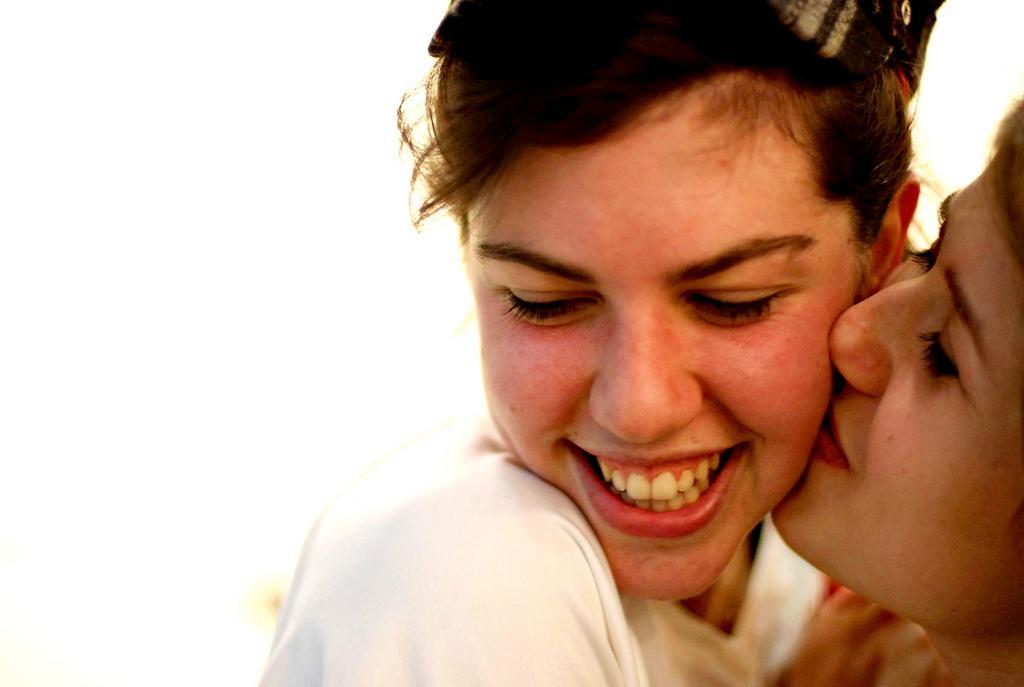

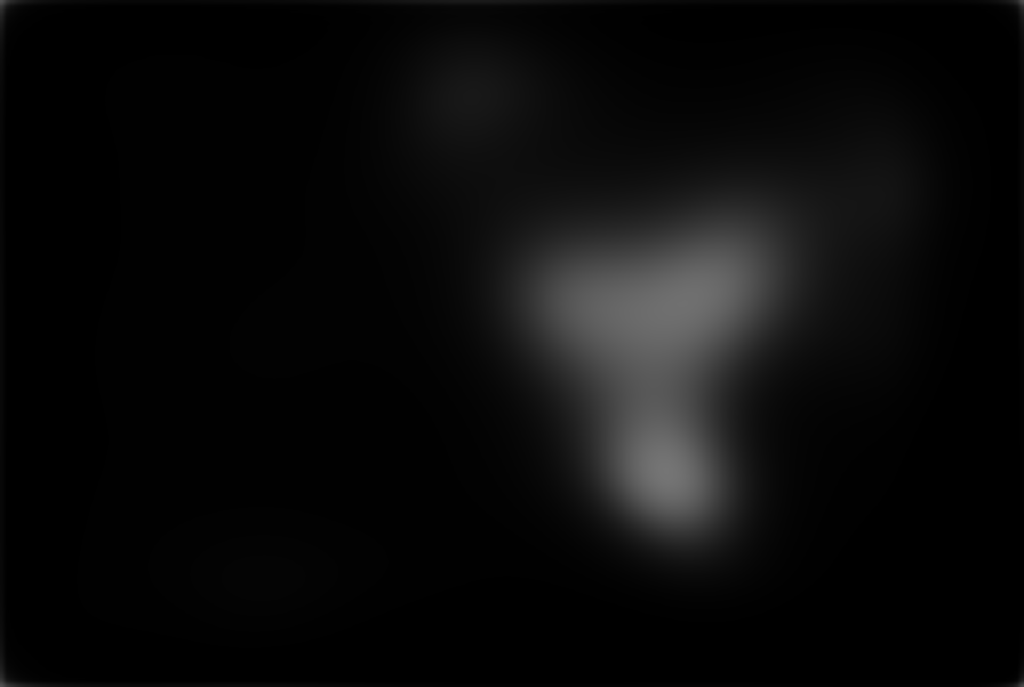

In [42]:
def test(path_to_images, model_to_test=None):
      img = cv2.imread(os.path.join(path_to_images))
      saliency = predict(model=model_to_test, image_stimuli=img)
      return saliency 

image = cv2.imread('/content/112.jpg')
# Here need to specify the path to images and output path
saliency = test(path_to_images='/content/112.jpg', model_to_test=model)
cv2_imshow(image)
cv2_imshow(saliency*255.0)